In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Import rainfall & flow data into dataframes

In [29]:
%%time
flow60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 1)

Wall time: 1min 17s


In [30]:
%%time
rainfall60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 3)

Wall time: 1min 18s


In [42]:
#Replace missing values with NaN for flow and rainfall
rainfall60_filtered = rainfall60.replace('  ---',"NaN") #There are two spaces before the dashes in the rainfall data
flow60_filtered = flow60.replace(" ---","NaN") #But only one in the flow data
#(this is really stupid, no idea why they've done that)
#(this doesn't fix the original error but it stops you getting another after you do)

rainfall60_filtered = rainfall60_filtered.replace(".", 0) #Replacing . to NaN #CHANGED 
##In this case, they seemed to have used . to indicate 0 rainfall, so replacing '.' with 0 is probably a better idea
##Why they couldn't have just put 0 in the sheet, I don't know.
##(This fixes the original error you sent me)

##ALSO - you've used "rainfall60_filtered = rainfall60.replace('something','something_else')" twice
#If you want to keep the changes from the first time you use it the second one should be:

#"rainfall60_filtered = rainfall60_filtered.replace('something','something_else')" i.e with _filtered on the right


#You can actually do both in one go with:

#rainfall60_filtered = rainfall60.replace([".","  ---"],[0,"NaN"])

#but it does make the code slightly harder to read




rainfall60_filtered.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,1979-07-26,09:00:00,0,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [43]:
#Print rainfall data with missing values - only 3 values missing
print(rainfall60_filtered['Date'][rainfall60_filtered['Quality']=='missing'].unique())

['1980-04-30T00:00:00.000000000' '1980-05-01T00:00:00.000000000'
 '2002-10-03T00:00:00.000000000']


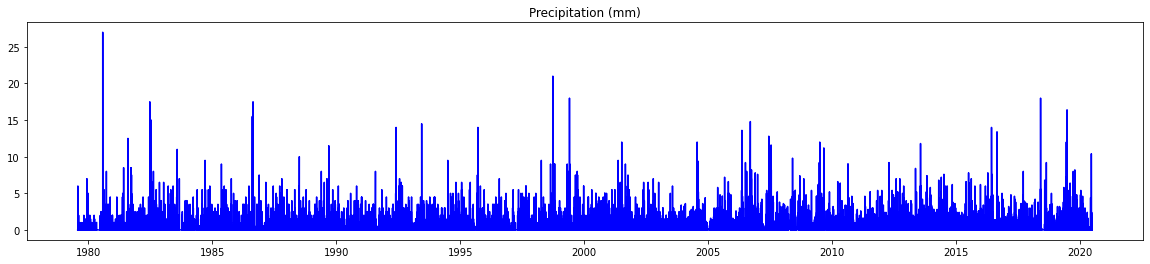

In [44]:
#Plot the rainfall time series
#print(rainfall60_filtered['Precipitation [mm]'])

plt.figure(figsize=(20,4))
plt.plot(rainfall60_filtered['Date'],rainfall60_filtered['Precipitation [mm]'], 'blue')
plt.title("Precipitation (mm)")

#rainfall60_filtered.plot(x='Date', y='Precipitation [mm]')
plt.show()

In [22]:
%%time
rainfall15 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 15 min.xlsx', 
                      sheet_name = 3)

FileNotFoundError: [Errno 2] No such file or directory: 'EA_files_subsample/Shipston Wiski data - 15 min.xlsx'

In [ ]:
rainfall15_filtered = rainfall15.replace("---","NaN")   #Replacing missing values again


In [ ]:
#Print rainfall data with missing values - only 1 value missing
print(rainfall15['Date'][rainfall15['Quality']=='missing'].unique())

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rainfall15_filtered['Date'],rainfall15_filtered['Precipitation [mm]'], 'blue')
plt.yticks()
plt.title("Precipitation (mm)")